# Machine Learning based Irrigation Scheduling for Smart Forming Systems


In [1]:
#importing dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import os
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import BernoulliNB


In [3]:
#uploading dataset

In [4]:
df = pd.read_csv(r'dataset\data.csv')

In [5]:
df.head()


,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [6]:
#data analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.describe()

,moisture,temp,pump
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


In [9]:
#Checking NULL values

In [10]:
df.isnull().sum()

crop        0
moisture    0
temp        0
pump        0
dtype: int64

In [11]:
Labels = ['crop']

for i in Labels:
    df[i] = LabelEncoder().fit_transform(df[i])
df

,crop,moisture,temp,pump
0,0,638,16,1
1,0,522,18,1
2,0,741,22,1
3,0,798,32,1
4,0,690,28,1
...,...,...,...,...
195,0,941,13,1
196,0,902,45,1
197,0,894,42,1
198,0,1022,45,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   crop      200 non-null    int32
 1   moisture  200 non-null    int64
 2   temp      200 non-null    int64
 3   pump      200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [13]:
labels = ['ON','OFF']
labels

['ON', 'OFF']

In [14]:
#Data Visulazation

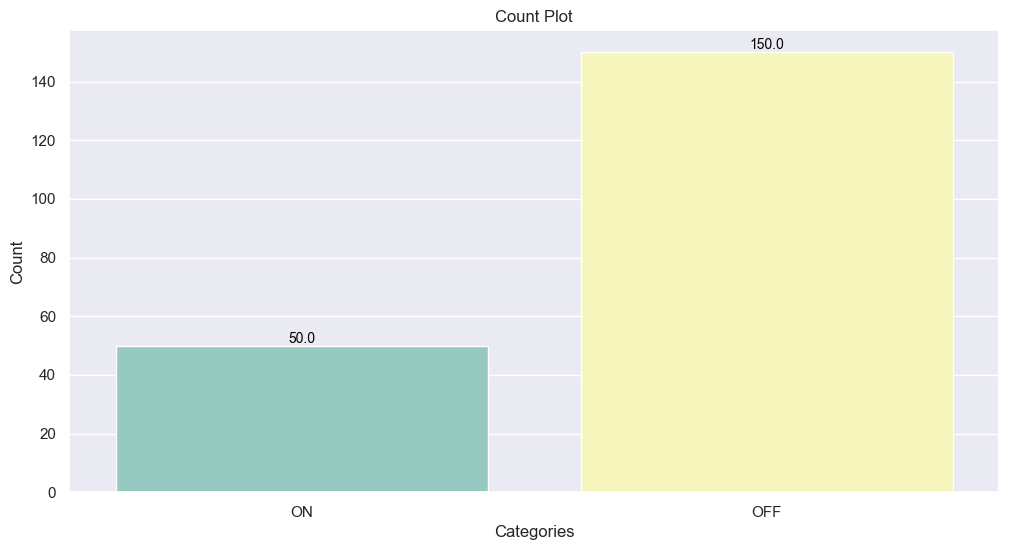

In [15]:
sns.set(style="darkgrid") 
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x=df['pump'], data=df, palette="Set3")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 

ax.set_xticklabels(labels)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  

In [16]:
#Declaring independent and dependent variable

In [17]:
x = df.drop(['pump'],axis = 1)
x.head()

,crop,moisture,temp
0,0,638,16
1,0,522,18
2,0,741,22
3,0,798,32
4,0,690,28


In [18]:
y = df['pump']
y

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: pump, Length: 200, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [20]:
x_train.shape

(140, 3)

In [21]:
y_train.shape

(140,)

In [22]:
#performance evalution

In [23]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [24]:
# BernoulliNB Classifier model building

BernoulliNBClassifier Accuracy    : 75.0
BernoulliNBClassifier Precision   : 37.5
BernoulliNBClassifier Recall      : 50.0
BernoulliNBClassifier FSCORE      : 42.857142857142854

 BernoulliNBClassifier classification report
               precision    recall  f1-score   support

          ON       0.00      0.00      0.00         0
         OFF       1.00      0.75      0.86        60

    accuracy                           0.75        60
   macro avg       0.50      0.38      0.43        60
weighted avg       1.00      0.75      0.86        60



c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


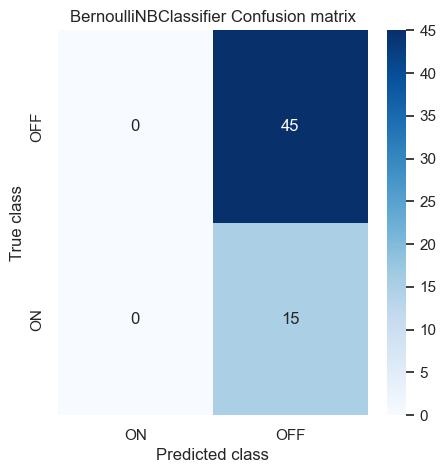

In [25]:
bnb_model_path = 'model/BernoulliNBClassifier.npy'
if os.path.exists(bnb_model_path):
    # Load the Bernoulli Naive Bayes Classifier model
    bnb_classifier = np.load(bnb_model_path, allow_pickle=True).item()
else:                       
    # Train and save the Bernoulli Naive Bayes Classifier model
    bnb_classifier = BernoulliNB()
    bnb_classifier.fit(x_train, y_train)
    np.save(bnb_model_path, bnb_classifier)

# Predict using the trained Bernoulli Naive Bayes Classifier model
y_pred_bnb = bnb_classifier.predict(x_test)

# Evaluate the Bernoulli Naive Bayes Classifier model
performance_metrics('BernoulliNBClassifier', y_pred_bnb, y_test)

In [26]:
#Ridge Classifier model building

RidgeClassifier Accuracy    : 96.66666666666667
RidgeClassifier Precision   : 97.87234042553192
RidgeClassifier Recall      : 93.33333333333333
RidgeClassifier FSCORE      : 95.3416149068323

 RidgeClassifier classification report
               precision    recall  f1-score   support

          ON       0.87      1.00      0.93        13
         OFF       1.00      0.96      0.98        47

    accuracy                           0.97        60
   macro avg       0.93      0.98      0.95        60
weighted avg       0.97      0.97      0.97        60



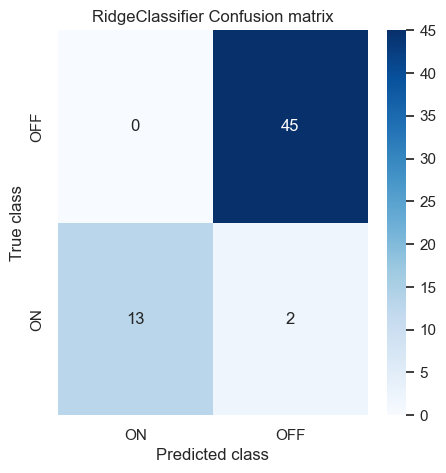

In [27]:
from sklearn.linear_model import RidgeClassifier

ridge_model_path = 'model/RidgeClassifier.npy'
if os.path.exists(ridge_model_path):
    ridge_classifier = np.load(ridge_model_path, allow_pickle=True).item()
else:                       
    ridge_classifier = RidgeClassifier()
    ridge_classifier.fit(x_train, y_train)
    np.save(ridge_model_path, ridge_classifier)

y_pred_ridge = ridge_classifier.predict(x_test)

performance_metrics('RidgeClassifier', y_pred_ridge, y_test)

### Tabular form of Performance Metrics

In [28]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["BernoulliNB Classifier", "Ridge Classifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,BernoulliNB Classifier,37.50000,50.000000,42.857143,75.000000
1,Ridge Classifier,97.87234,93.333333,95.341615,96.666667


In [29]:
#Uploading testing dataset

In [30]:
test=pd.read_csv("test.csv")
test

,crop,moisture,temp
0,cotton,638,16
1,cotton,522,18
2,cotton,741,22
3,cotton,798,32
4,cotton,59,20
5,cotton,206,37
6,cotton,143,43
7,cotton,52,44


In [31]:
Test_Labels = ['crop']

for i in Test_Labels:
    test[i] = LabelEncoder().fit_transform(test[i])
test

,crop,moisture,temp
0,0,638,16
1,0,522,18
2,0,741,22
3,0,798,32
4,0,59,20
5,0,206,37
6,0,143,43
7,0,52,44


In [32]:
#Model prediction on test data

In [33]:
predict = ridge_classifier.predict(test)

for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i]) 
        print("Model Predicted of Row {} Test Data is--->".format(i),labels[0])
    elif p == 1:
        print(test.iloc[i])  
        print("Model Predicted of Row {} Test Data is--->".format(i),labels[1])
        

crop          0
moisture    638
temp         16
Name: 0, dtype: int64
Model Predicted of Row 0 Test Data is---> OFF
crop          0
moisture    522
temp         18
Name: 1, dtype: int64
Model Predicted of Row 1 Test Data is---> OFF
crop          0
moisture    741
temp         22
Name: 2, dtype: int64
Model Predicted of Row 2 Test Data is---> OFF
crop          0
moisture    798
temp         32
Name: 3, dtype: int64
Model Predicted of Row 3 Test Data is---> OFF
crop         0
moisture    59
temp        20
Name: 4, dtype: int64
Model Predicted of Row 4 Test Data is---> ON
crop          0
moisture    206
temp         37
Name: 5, dtype: int64
Model Predicted of Row 5 Test Data is---> ON
crop          0
moisture    143
temp         43
Name: 6, dtype: int64
Model Predicted of Row 6 Test Data is---> ON
crop         0
moisture    52
temp        44
Name: 7, dtype: int64
Model Predicted of Row 7 Test Data is---> ON
